# 1. Dynamic Programming

In [1]:
import numpy as np
import matplotlib.pyplot as plt

**Q1:**

In [2]:
#Implement MDP model
gamma = 0.95

def p(statef, statei, a):
    if statei == 0:
        return [[0.55, 0.45, 0], [0.3, 0.7, 0], [1, 0, 0]][a][statef]
    elif statei == 1:
        return [[1, 0, 0], [0, 0.4, 0.6], [0, 1, 0]][a][statef]
    else:
        return [[0, 1, 0], [0, 0.6, 0.4], [0, 0, 1]][a][statef]
    
def r(state, a):
    if state == 0:
        return [0, 0, 5/100][a]
    elif state == 1:
        return [0, 0, 0][a]
    else:
        return [0, 1, 9/10][a]

def P(pi):
    P = np.eye(3)
    for x in range(3):
        for y in range(3):
            P[x,y] = p(y, x, pi[x])
    return P

def r_(pi):
    return([r(x, pi[x]) for x in range(3)])

In this simple MDP it's simple to guess the optimal policy $\pi^*$. Indeed:

- if we are in the state 2 we have to do tha action 2 (clear, it's the biggest one and we will be able to do it again because it brings us to the same state). 
- if we are in the state 1, we can go in the state 1 by trying the action 1. If we try it again and again, the probability to stay in the state 1 is zero.
- if we are in the state 0, we want to go in the state 2 even if we can have a reward with action 2, the reward is much smaller than the reward in state 2. We choose action 1 because we have bigger chance to go in state (1 then 2) than if we choose action 0 and it's the same rewards (0).

So, we guess the optimal policy: $\boxed{\,\pi^* = (1, 1, 2)\,}$


**Q2:**

In [3]:
def T(W):
    TW = []
    for x in [0,1,2]:
        L = []
        for a in [0, 1, 2]:
            s = 0
            for y in [0, 1, 2]:
                s = s + p(y, x, a)*W[y]
            L.append(r(x, a) + gamma*s)
        TW.append(max(L))
    return TW

def greedy_policy(V):
    pi = []
    for x in [0, 1, 2]:
        L = []
        for a in [0, 1, 2]:
            s = 0
            for y in [0, 1, 2]:
                s = s + p(y, x, a)*V[y]
            L.append(r(x, a) + gamma*s)
        pi.append(np.argmax(L))
    return pi

In [4]:
#Implement Value Iteration
def VI(V0, epsilon):
    #initialization
    V = V0
    #value iteration
    while(np.linalg.norm(np.array(T(V))- V, ord=np.inf) >= epsilon):
        V = T(V)
    #compute the greedy policy
    return greedy_policy(V)

In [5]:
VI([10,1,1], 0.01)

[1, 1, 2]

Wih **Value Iteration** and $\bf{\epsilon = 0.01}$, we find the guessed optimaly policy $\pi^* = (1, 1, 2)$.

In [6]:
#exact policy evaluation
def policy_evaluation(pi):
    return np.linalg.inv(np.eye(3)-gamma*P(pi)).dot(r_(pi))

In [7]:
pi_star = [1, 1, 2]
V_star = policy_evaluation(pi_star)

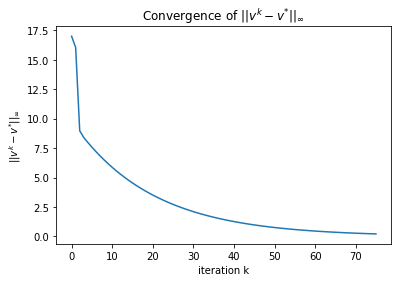

In [8]:
def plot_conv(V0,epsilon):
    L = []
    #initialization
    V = V0
    #value iteration
    while(np.linalg.norm(np.array(T(V))- V, ord=np.inf) >= epsilon):
        L.append(np.linalg.norm(np.array(V)- V_star,ord=np.inf))
        V = T(V)
    plt.plot(L)
    plt.title("Convergence of $||v^k - v^{*}||_{\infty}$")
    plt.xlabel("iteration k")
    plt.ylabel("$||v^k - v^{*}||_{\infty}$")
    plt.show()

plot_conv([10, 1, 1], 0.01)

**Q3:**

In [9]:
def policy_iteration(pi0):
    #initialization
    pi = pi0
    
    #first iteration
    #policy evaluation
    V = policy_evaluation(pi)
    #policy improvement
    pi = greedy_policy(V)
    
    temp = np.array([]) # we will save the previous value of V in temp to compare it with the new V
    while(temp.tolist() != V.tolist()):
        #exact policy evaluation
        temp = V
        V = policy_evaluation(pi)
        #policy improvement
        pi = greedy_policy(V)
    
    return pi

policy_iteration([0,0,0])

[1, 1, 2]

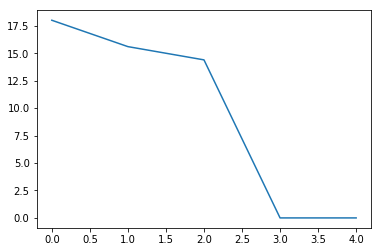

In [10]:
def plot_conv(pi0):
    L = []
    k =0 # number of iterations
    #initialization
    pi = pi0
    
    #first iteration
    #policy evaluation
    V = policy_evaluation(pi)
    #policy improvement
    pi = greedy_policy(V)
    L.append(np.linalg.norm(V- V_star, ord=np.inf))
    k = k + 1
    temp = np.array([]) # we will save the previous value of V in temp to compare it with the new V
    while(temp.tolist() != V.tolist()):
        #exact policy evaluation
        temp = V
        V = policy_evaluation(pi)
        #policy improvement
        pi = greedy_policy(V)
        L.append(np.linalg.norm(V- V_star, ord=np.inf))
        k = k + 1
    
    plt.plot(L)
    return k
    
plot_conv([0,0,0])
plt.show()

In [11]:
#compute the maximum of iteration of the policy iteration algorithm
def max_iteration():
    L = []
    # we try all the initial policies
    for i in range(3):
        for j in range(3):
            for l in range(3):
                L.append(plot_conv([i, j, l]))
    return(max(L))
print("Maximum of iteration of the policy iteration algorithm: ",max_iteration())

Maximum of iteration of the policy iteration algorithm:  5


**Conclusion:**

- We have 5 iterations maximum with the policy iteration algorithm, it depends on the pi0 initial. So it converge very quickly. However, each iteration requires a full policy evaluation which is expensive.
- We have far more iterations (dozens) with the value iteration algorithm to reach the stopping criterion, moreover, in general, we do not know if it will reach exactly the optimal policy, the convergence is only asymptotic. However, each iteration is very computationally efficient.

# 2. Reinforcement Learning

## 1. Policy evaluation

**Q4:**

In [12]:
from gridworld import GridWorld1
import gridrender as gui
import numpy as np
import time

In [13]:
env = GridWorld1
env.render = False

In [14]:
#compute Tmax
delta = 0.5
Rmax = 1
gamma = 0.95
Tmax = -np.log(delta/Rmax)/(1-gamma)
Tmax

13.862943611198894

In [15]:
#estimate mu0
mu0 = [0]*env.n_states
N = 100000
for k in range(N):
    mu0[env.reset()] += 1
mu0 = np.array(mu0)/N
mu0

array([ 0.14336,  0.0911 ,  0.08994,  0.04149,  0.09039,  0.09133,
        0.09045,  0.09105,  0.09028,  0.08907,  0.09154])

In [16]:
Tmax = 14

def simulate_trajectory():
    state = env.reset()
    s = state
    t = 0
    R = 0
    term = False
    while (term == False) and t<=Tmax:
        t = t + 1
        if 0 in env.state_actions[s]:
            action = 0
        else:
            action = 3
        nexts, reward, term = env.step(s,action)
        s = nexts
        R = R + gamma**(t-1)*reward
    return state, R

#test
simulate_trajectory()

(5, -1.0)

In [17]:
def monte_carlo(n):
    L = [0]*env.n_states
    N = [0]*env.n_states
    for k in range(n):
        s, R = simulate_trajectory()
        L[s] = L[s] + R
        N[s] = N[s] + 1
    for k in range(len(N)):
        if N[k]!=0:
            L[k] = L[k]/N[k]
    return L

Vn = monte_carlo(100)
Vn

[0.8987395833333333,
 0.9277347991071425,
 0.9783333333333333,
 0.0,
 0.6065928124999999,
 -0.9888888888888887,
 0.0,
 -0.8030040285156249,
 -0.8849012499999999,
 -0.9251416666666664,
 -1.0]

In [18]:
v_q4 = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.67106071, -0.99447514, 0.00000000, -0.82847001, -0.87691855,
        -0.93358351, -0.99447514]

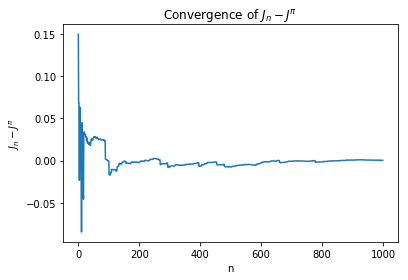

In [21]:
#plot Monte-Carlo convergence of Jn - J_pi
def plot_monte_carlo(n):
    L = [0]*env.n_states
    N = [0]*env.n_states
    Jn = [0]*n
    for k in range(n):
        s, R = simulate_trajectory()
        L[s] = L[s] + R
        N[s] = N[s] + 1
        
        L_plot = [0]*env.n_states
        for l in range(env.n_states):
            if N[l]!=0:
                L_plot[l] = L[l]/N[l]
                
        #compute J
        J = 0
        for s in range(env.n_states):
            J += mu0[s]*v_q4[s]
        #compute Jn
        for s in range(env.n_states):
            Jn[k] += mu0[s]*L_plot[s]
    
    plt.plot(Jn - J)    
    plt.title("Convergence of $J_n - J^\pi$")
    plt.ylabel('$J_n - J^\pi$')
    plt.xlabel('n')
    plt.show()
    
    return L

Vn = plot_monte_carlo(1000)

## 2. Policy optimization: the Q-learning algorithm.

**Q5:**

In [22]:
import random as rd

In [23]:
v_opt = [0.87691855, 0.92820033, 0.98817903, 0.00000000, 0.82369294, 0.92820033, 0.00000000, 0.77818504, 0.82369294,
         0.87691855, 0.82847001]

In [24]:
Tmax = 15
epsilon = 0.05

def alpha(i,x,a):
    return(1/i)

def Q_learning(n):
    Q = np.zeros((env.n_states, 4))
    N = np.zeros((env.n_states, 4)) # N(x,a) = number of visits of (x,a)
    Reward_tot = 0
    for i in range(n):
        x = env.reset()
        t = 0
        term = False
        while (term == False) and t<=Tmax:
            t = t + 1
            r = rd.random()
            if(r<1-epsilon):
                b = np.argmax([Q[x,a] for a in range(4)])
                if b in env.state_actions[x]:
                    a = b
                else:
                    a = np.random.choice(env.state_actions[x])
            else:
                a = np.random.choice(env.state_actions[x])
            N[x,a] += 1
            x_, reward, term = env.step(x,a)
            Reward_tot += reward
            Q[x, a] = (1-alpha(N[x,a], x, a))*Q[x,a] + alpha(N[x,a], x, a)*(reward + gamma*max([Q[x_, b] for b in range(4)]))
            x = x_
            
    return Q, Reward_tot

Q, Reward_tot = Q_learning(10000)

In [25]:
def greedy_policy_Q(Q):
    pi = [0]*env.n_states
    for x in range(env.n_states):
        pi[x] = np.argmax([Q[x, a] for a in range(4)])
    return pi

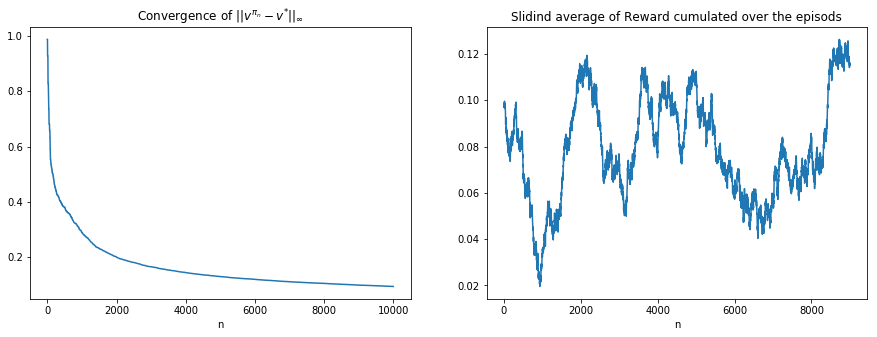

In [27]:
#let find good parameters alpha and epsilon

Tmax = 15
def plot_Q_learning(n, z, epsilon):
    
    def alpha(i,x,a):
        return(1/i**z)
    
    Q = np.zeros((env.n_states, 4))
    N = np.zeros((env.n_states, 4)) # N(x,a) = number of visits of (x,a)
    L = []
    L_reward = []
    L_all_reward = []
    
    
    for i in range(n):
        
        Reward_tot = 0
        x = env.reset()
        t = 0
        term = False
        while (term == False) and t<=Tmax:
            t = t + 1
            
            r = rd.random()
            if(r<1-epsilon):
                b = np.argmax([Q[x,a] for a in range(4)])
                if b in env.state_actions[x]:
                    a = b
                else:
                    a = np.random.choice(env.state_actions[x])
            else:
                a = np.random.choice(env.state_actions[x])

            
            N[x,a] += 1
            x_, reward, term = env.step(x,a)
            Reward_tot = Reward_tot + gamma**(t-1)*reward
            Q[x, a] = (1-alpha(N[x,a], x, a))*Q[x,a] + alpha(N[x,a], x, a)*(reward + gamma*max([Q[x_, b] for b in range(4)]))
            x = x_
            
        #plot updates
        V = [max([Q[x,a] for a in range(4)]) for x in range(env.n_states)]
        L.append(np.linalg.norm(np.array(v_opt)-V, ord=np.inf))
        L_reward.append(Reward_tot)
        
    #sliding average of Reward_tot
    n_slide = 1000
    L_slide = []
    for k in range(len(L_reward)-n_slide):
        L_slide.append(np.sum(L_reward[k:k+n_slide])/n_slide)
    
    
    # Two subplots, unpack the axes array immediately
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)    
    plt.title("Convergence of $||v^{\pi_n} - v^{*}||_{\infty}$")
    plt.plot(L)
    plt.xlabel("n")
    plt.subplot(1,2,2)
    plt.title("Slidind average of Reward cumulated over the episods")
    plt.xlabel("n")
    plt.plot(L_slide)
    plt.show()
    
    return Q, L_all_reward

Q, L_all_reward = plot_Q_learning(10000, 1, 0.8)

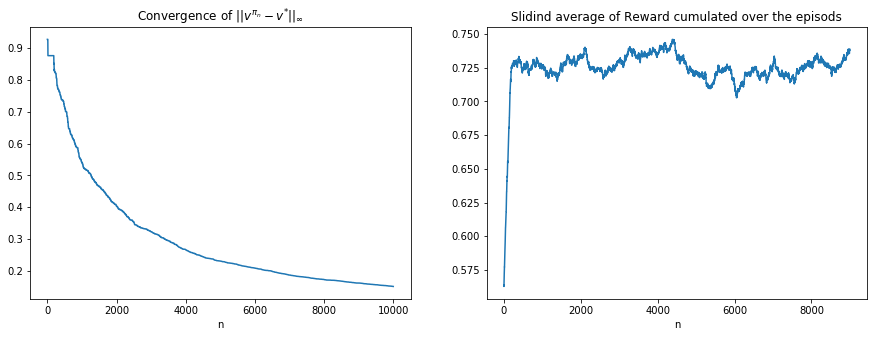

In [28]:
Q, L_all_reward = plot_Q_learning(10000, 1, 0.05)

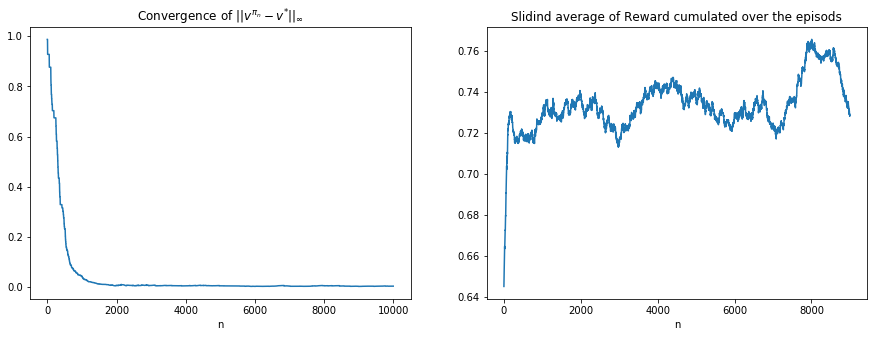

In [29]:
Q, L_all_reward = plot_Q_learning(10000, 0.7, 0.05)

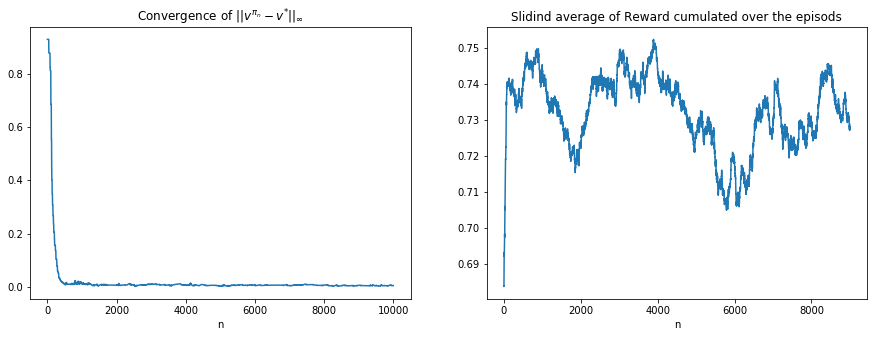

In [30]:
Q, L_all_reward = plot_Q_learning(10000, 0.51, 0.05)

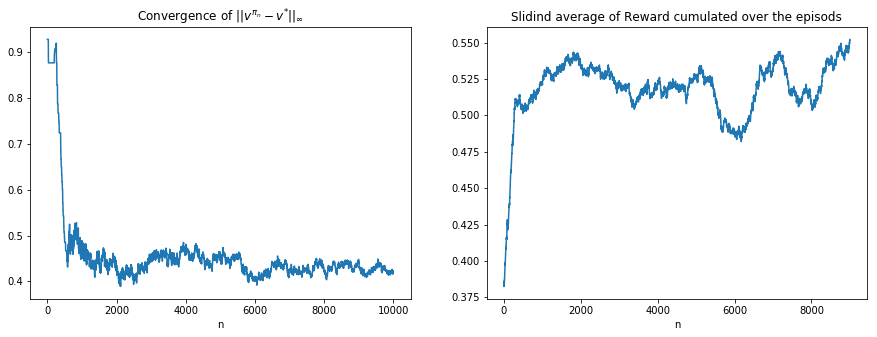

In [33]:
Q, L_all_reward = plot_Q_learning(10000, 0.51, 0.00001)

**Conclusion:**

Influence of $\epsilon$:
- When epsilon is too small, we do not explore enough so we do not converge quickly because it can be very long to find the best policy if we do not try enough new actions!

- When epsilon is too big, we explore a lot but we do not do the best policy (best policy approximate) so Q will not converge quickly to the optimal policy because our agent has not an optimal behaviour.

So we have to find a good epsilon which is a tradoff between exploration and exploitation.

Influence of $\alpha$:
- When alpha is equal to $\frac{1}{N^{0.6}}$ it converge much faster than with $\frac{1}{N}$. We give more weight to new learning with the first version of alpha, which can be good because Q is better in the present than in the past. However the  Reward cumulated over episods is more fluctuating.


**Q6:**

We try different random $\mu_0$ to see the difference on the optimal policy found.

In [34]:
# create random initial distribution mu_0 for n_states
def generate_random_mu(n_states):
    mu_0 = np.sort(np.random.random(n_states))
    mu_0[-1] = 1
    mu_0[-1] = 1-mu_0[-2]
    for i in range(len(mu_0)-2,0,-1):
        mu_0[i] -= mu_0[i-1]
    return mu_0

In [35]:
#draw the initial state with mu_0 initialization probability
def initialize_state(mu_0):
    random = np.random.random()
    s = 0
    x = 0
    for k in range(len(mu_0)):
        if s <= random < s + mu_0[k]:
            x = k
        s += mu_0[k]
    return x

In [36]:
def alpha(i,x,a):
    return(1/i**0.75)

#Q_learning with mu_0 initialization
def Q_learning(n, mu_0):
    Q = np.zeros((env.n_states, 4))
    N = np.zeros((env.n_states, 4)) # N(x,a) = number of visits of (x,a)
    for i in range(n):
        x = initialize_state(mu_0)
        t = 0
        term = False
        while (term == False) and t<=Tmax:
            t = t + 1
            r = rd.random()
            if(r<1-epsilon):
                b = np.argmax([Q[x,a] for a in range(4)])
                if b in env.state_actions[x]:
                    a = b
                else:
                    a = np.random.choice(env.state_actions[x])
            else:
                a = np.random.choice(env.state_actions[x])
            N[x,a] += 1
            x_, reward, term = env.step(x,a)
            Q[x, a] = (1-alpha(N[x,a], x, a))*Q[x,a] + alpha(N[x,a], x, a)*(reward + gamma*max([Q[x_, b] for b in range(4)]))
    return Q

In [37]:
#we try several random initialization mu_0 to see the impact on the optimal policy
for k in range(10):
    mu_0 = generate_random_mu(env.n_states)
    Q = Q_learning(100000, mu_0)
    greedy_pi = [np.argmax([Q[x,a] for a in range(4)]) for x in range(env.n_states)]
    print("mu_0 = ",np.trunc(mu_0*100)/100, "gives greedy_pi = ", greedy_pi)

mu_0 =  [ 0.07  0.11  0.    0.21  0.05  0.    0.    0.05  0.    0.12  0.33] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2]
mu_0 =  [ 0.06  0.04  0.16  0.    0.17  0.06  0.07  0.21  0.14  0.01  0.04] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 2]
mu_0 =  [ 0.04  0.05  0.02  0.02  0.21  0.02  0.03  0.03  0.09  0.01  0.43] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 2]
mu_0 =  [ 0.01  0.01  0.02  0.04  0.03  0.04  0.18  0.    0.08  0.38  0.15] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2]
mu_0 =  [ 0.09  0.08  0.36  0.    0.01  0.03  0.1   0.11  0.01  0.08  0.08] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2]
mu_0 =  [ 0.    0.12  0.03  0.1   0.06  0.18  0.08  0.    0.05  0.09  0.24] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 3, 0, 3, 2]
mu_0 =  [ 0.09  0.04  0.11  0.06  0.09  0.12  0.01  0.17  0.04  0.08  0.13] gives greedy_pi =  [0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 2]
mu_0 =  [ 0.05  0.01  0.08  0.01  0.03  0.31  0.11  0.03  0.31  0.    0.01] gives greedy_pi =  [0

**Conclusion:**

-The optimal policy is not affected by the choice of $\mu_0$ if  $\mu_0[i] > 0$ $\forall i$. Moreover, if we have the two conditions ($\mu_0[j] = 0$) **and** (j is a not reachable state from the other states), then the optimal action of the state j is not relevant because we never update the Q value of this state. However, all the other optimal actions for the states i with $\mu_0[i] > 0$ are correct. So, if we do not have state j which verify the two conditions, the optimal policy will be always the same. In our problem, we never have (j is a not reachable state from the other states) so **we always have the same optimal policy which do not depend of $\mu_0$!**

-Furthermore, the values of $\mu_0$ are important for the speed of convergence. Even, if we converge theoretically to the optimal policy it can take very long time if we have a bad $\mu_0$! That's why above some policies do not have reach the optimal policy.